Random Forest Model Evaluation:
Accuracy: 0.9466737064413939
Precision: 0.9397715472481828
Recall: 0.9546413502109705
F1 Score: 0.9471480900052328
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       946
           1       0.94      0.95      0.95       948

    accuracy                           0.95      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.95      0.95      0.95      1894



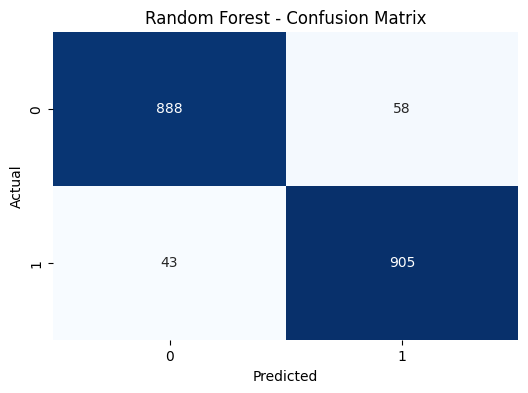

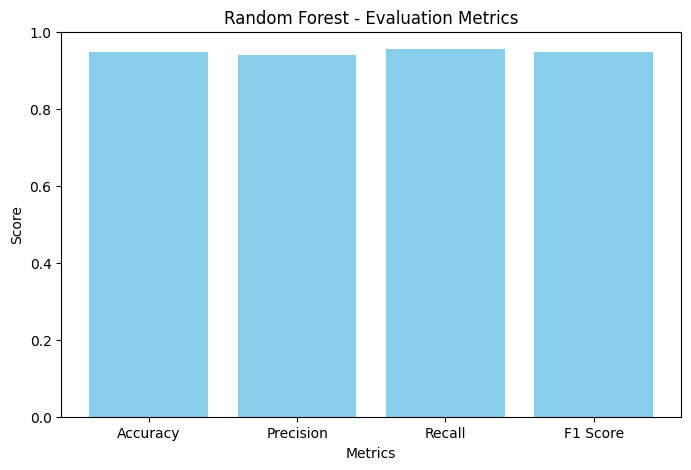

Support Vector Machine Model Evaluation:
Accuracy: 0.7697993664202746
Precision: 0.7504892367906066
Recall: 0.8090717299578059
F1 Score: 0.7786802030456853
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       946
           1       0.75      0.81      0.78       948

    accuracy                           0.77      1894
   macro avg       0.77      0.77      0.77      1894
weighted avg       0.77      0.77      0.77      1894



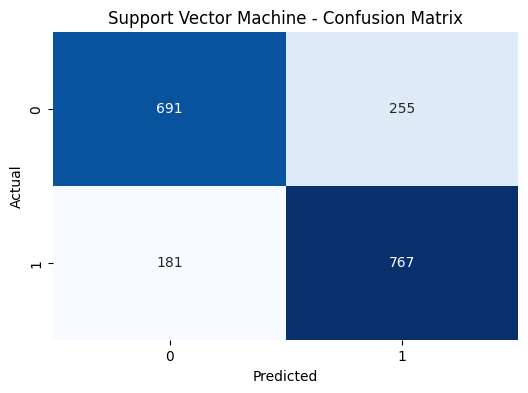

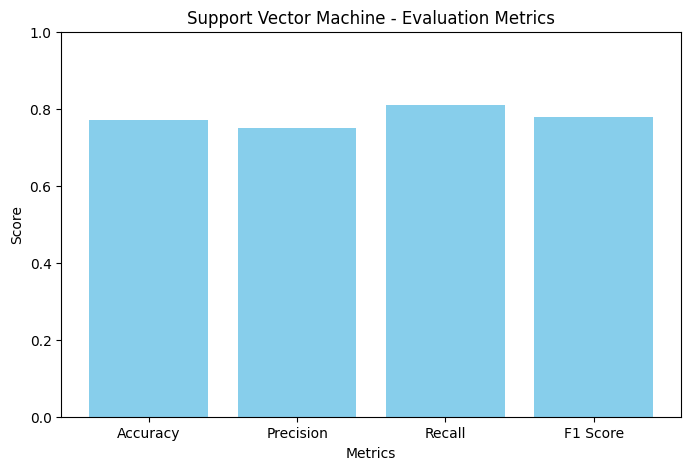

XGBoost Model Evaluation:
Accuracy: 0.9355860612460402
Precision: 0.923155737704918
Recall: 0.95042194092827
F1 Score: 0.9365904365904366
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       946
           1       0.92      0.95      0.94       948

    accuracy                           0.94      1894
   macro avg       0.94      0.94      0.94      1894
weighted avg       0.94      0.94      0.94      1894



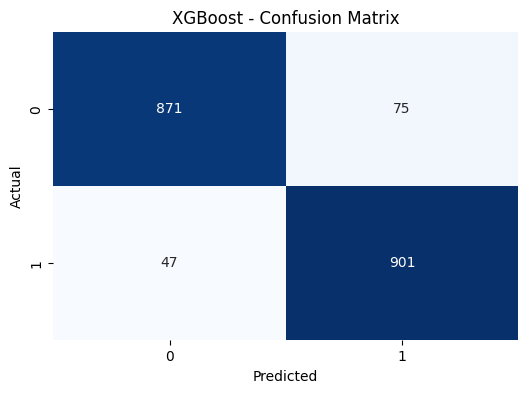

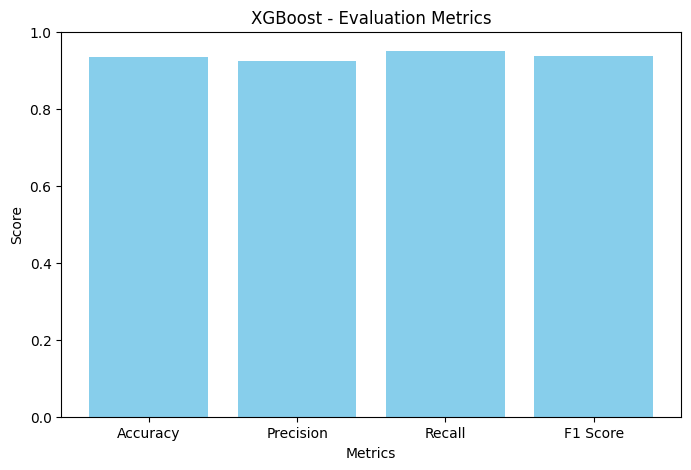

Artificial Neural Network Model Evaluation:
Accuracy: 0.8204857444561774
Precision: 0.8318777292576419
Recall: 0.8037974683544303
F1 Score: 0.8175965665236051
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       946
           1       0.83      0.80      0.82       948

    accuracy                           0.82      1894
   macro avg       0.82      0.82      0.82      1894
weighted avg       0.82      0.82      0.82      1894



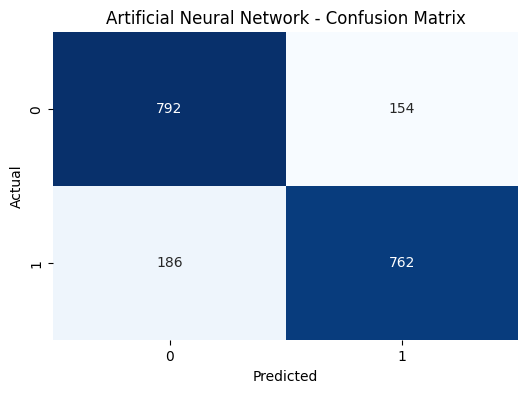

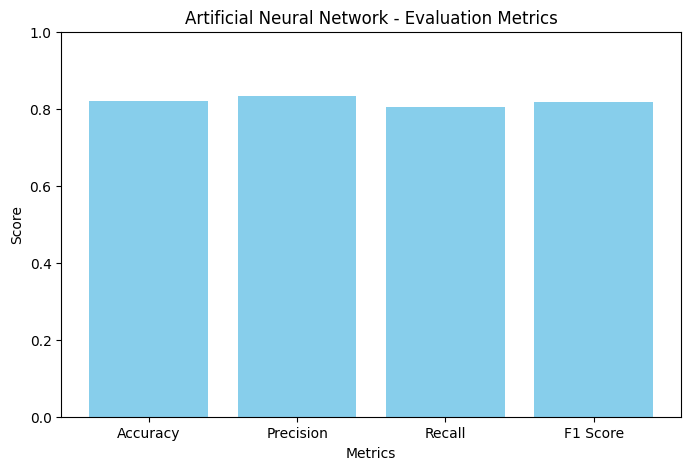

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define a function to train, evaluate, and display metrics for each model
def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Get evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    report = classification_report(y_test, y_pred, zero_division=1)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics and classification report
    print(f"{model_name} Model Evaluation:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Classification Report:\n", report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot Bar Graph for Metrics
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    plt.figure(figsize=(8, 5))
    plt.bar(metrics.keys(), metrics.values(), color='skyblue')
    plt.title(f'{model_name} - Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

# Initialize models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Instantiate models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "Artificial Neural Network": MLPClassifier(random_state=42, max_iter=300)
}

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, model_name)


Support Vector Machine (SVM) - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       943
           1       0.13      0.44      0.21        54

    accuracy                           0.81       997
   macro avg       0.55      0.64      0.55       997
weighted avg       0.92      0.81      0.86       997



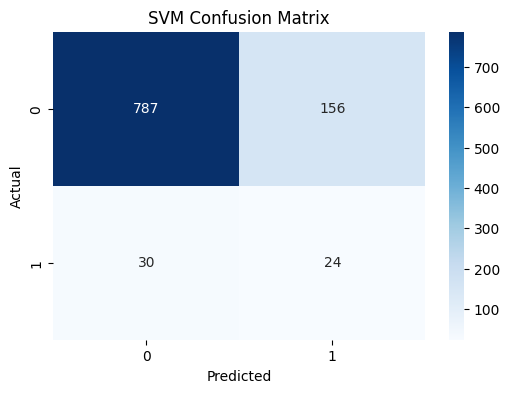


Artificial Neural Network (ANN) - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       943
           1       0.14      0.44      0.21        54

    accuracy                           0.82       997
   macro avg       0.55      0.64      0.55       997
weighted avg       0.92      0.82      0.86       997



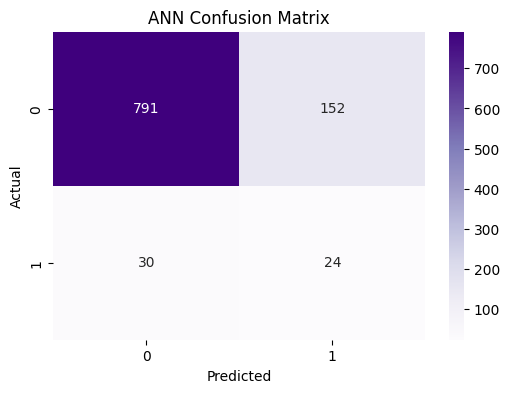

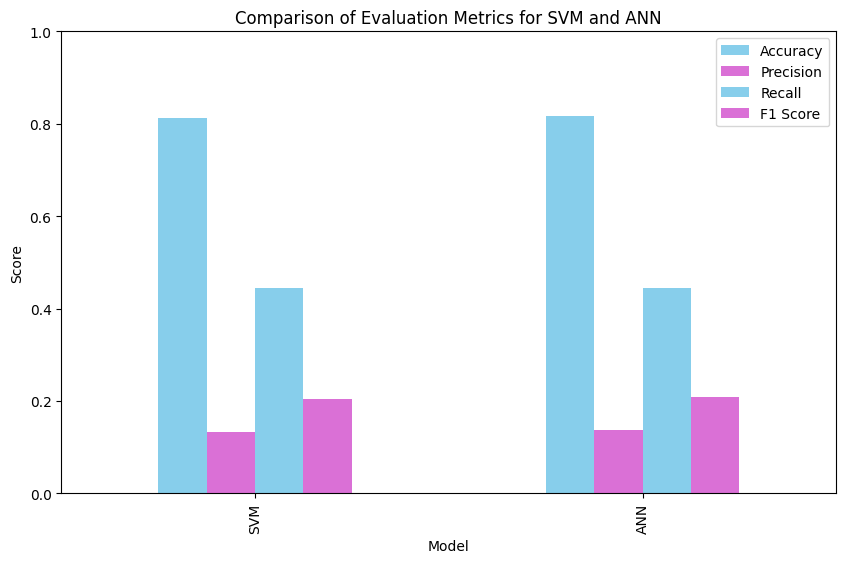

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Load dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode string columns to numeric values
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define target and features
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize features for ANN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test_scaled)

# SVM Evaluation Metrics
print("\nSupport Vector Machine (SVM) - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# SVM Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Artificial Neural Network (ANN) Model with adjustments
ann_model = MLPClassifier(random_state=42, max_iter=500, early_stopping=True)
ann_model.fit(X_train_scaled, y_train_resampled)
y_pred_ann = ann_model.predict(X_test_scaled)

# ANN Evaluation Metrics
print("\nArtificial Neural Network (ANN) - Classification Report:")
print(classification_report(y_test, y_pred_ann))

# ANN Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Purples')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Precision, Recall, F1 Scores as Bar Graphs for SVM and ANN
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_ann)],
    "Precision": [precision_score(y_test, y_pred_svm, zero_division=1), precision_score(y_test, y_pred_ann, zero_division=1)],
    "Recall": [recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_ann)],
    "F1 Score": [f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_ann)]
}

metrics_df = pd.DataFrame(metrics, index=["SVM", "ANN"])
metrics_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orchid'])
plt.title("Comparison of Evaluation Metrics for SVM and ANN")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="upper right")
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVM Model Evaluation:
Best Parameters: {'C': 100, 'gamma': 1}
Accuracy: 0.9044350580781415
Precision: 0.8933333333333333
Recall: 0.9187763713080169
F1 Score: 0.905876235049402
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       946
           1       0.89      0.92      0.91       948

    accuracy                           0.90      1894
   macro avg       0.90      0.90      0.90      1894
weighted avg       0.90      0.90      0.90      1894



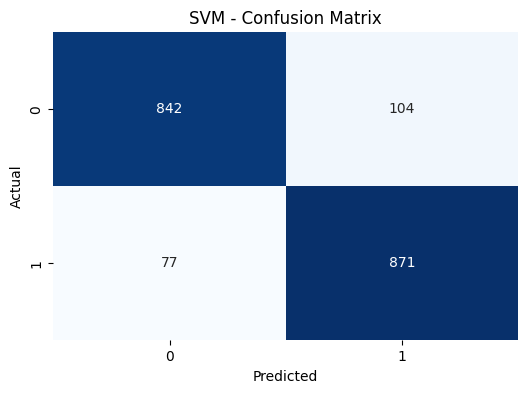

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features for SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid = GridSearchCV(SVC(random_state=42, probability=True), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

# Evaluate the tuned SVM model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

# Metrics and results
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, zero_division=1)
report = classification_report(y_test, y_pred, zero_division=1)
cm = confusion_matrix(y_test, y_pred)

print("SVM Model Evaluation:")
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-4-67892b5296ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


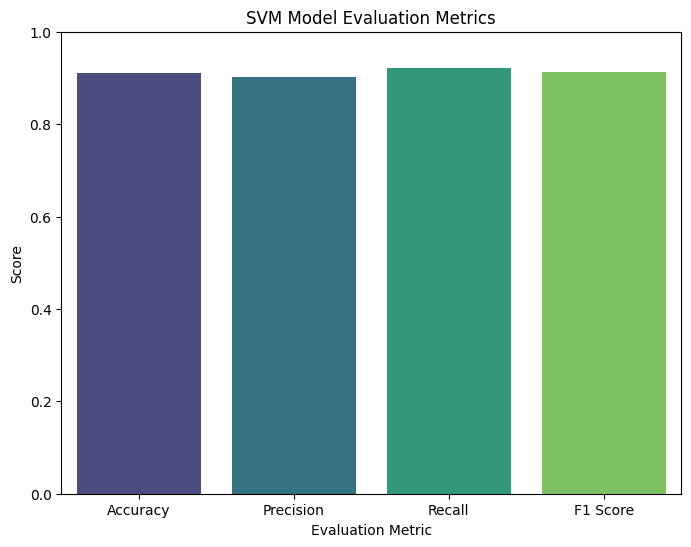

In [ ]:
# Plotting bar graph for model evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('SVM Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.show()


ANN Model Evaluation:
Accuracy: 0.9107708553326294
Precision: 0.9019607843137255
Recall: 0.9219409282700421
F1 Score: 0.9118414188836724
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       946
           1       0.90      0.92      0.91       948

    accuracy                           0.91      1894
   macro avg       0.91      0.91      0.91      1894
weighted avg       0.91      0.91      0.91      1894



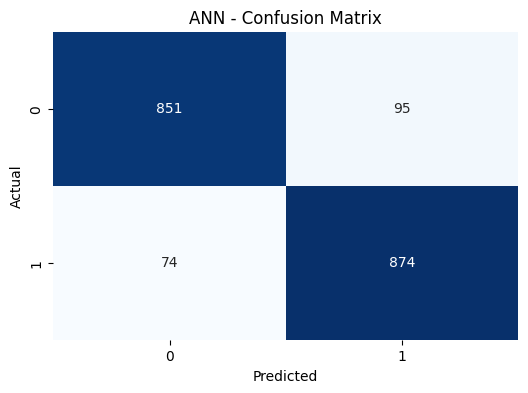

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features for ANN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and configure the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)

# Train the ANN model
ann_model.fit(X_train, y_train)

# Predictions and metrics for ANN
y_pred_ann = ann_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann, zero_division=1)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann, zero_division=1)
report = classification_report(y_test, y_pred_ann, zero_division=1)
cm = confusion_matrix(y_test, y_pred_ann)

print("ANN Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

# Plot Confusion Matrix for ANN
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('ANN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-5-fe2599c90109>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df_ann, palette='coolwarm')


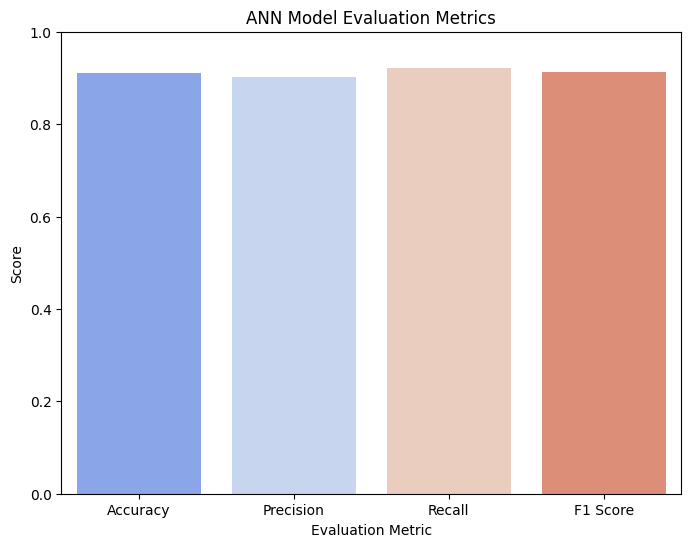

In [ ]:
# Plotting bar graph for ANN model evaluation metrics
metrics_ann = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Create a DataFrame for easier plotting
metrics_df_ann = pd.DataFrame(list(metrics_ann.items()), columns=['Metric', 'Score'])

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df_ann, palette='coolwarm')
plt.ylim(0, 1)
plt.title('ANN Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.show()


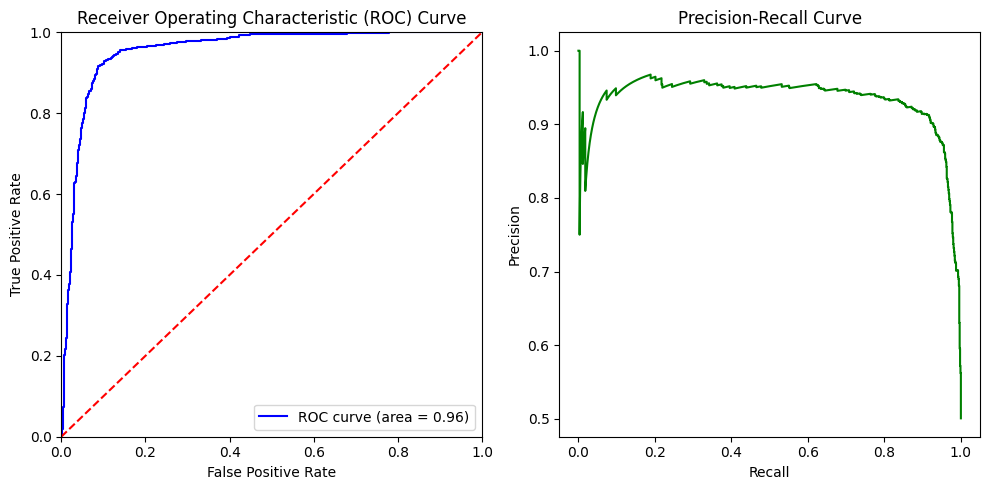

Classification Report for ANN Model:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       946
           1       0.90      0.92      0.91       948

    accuracy                           0.91      1894
   macro avg       0.91      0.91      0.91      1894
weighted avg       0.91      0.91      0.91      1894



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold

# Calculate probabilities for ROC and Precision-Recall curves
y_pred_proba_ann = ann_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ann)
roc_auc = roc_auc_score(y_test, y_pred_proba_ann)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_ann)

# Plot ROC Curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report for ANN Model:")
print(report)


In [ ]:
# Ablation study without SMOTE
X_train_no_smote, X_test_no_smote, y_train_no_smote, y_test_no_smote = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
X_train_no_smote = scaler.fit_transform(X_train_no_smote)
X_test_no_smote = scaler.transform(X_test_no_smote)

# Train ANN model without SMOTE
ann_model_no_smote = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
ann_model_no_smote.fit(X_train_no_smote, y_train_no_smote)

# Predictions and metrics for ANN without SMOTE
y_pred_no_smote = ann_model_no_smote.predict(X_test_no_smote)

accuracy_no_smote = accuracy_score(y_test_no_smote, y_pred_no_smote)
precision_no_smote = precision_score(y_test_no_smote, y_pred_no_smote, zero_division=1)
recall_no_smote = recall_score(y_test_no_smote, y_pred_no_smote)
f1_no_smote = f1_score(y_test_no_smote, y_pred_no_smote, zero_division=1)

print("\nAblation Study Results (Without SMOTE):")
print("Accuracy:", accuracy_no_smote)
print("Precision:", precision_no_smote)
print("Recall:", recall_no_smote)
print("F1 Score:", f1_no_smote)

# Print classification report without SMOTE
report_no_smote = classification_report(y_test_no_smote, y_pred_no_smote, zero_division=1)
print("Classification Report for ANN Model without SMOTE:")
print(report_no_smote)



Ablation Study Results (Without SMOTE):
Accuracy: 0.921765295887663
Precision: 0.038461538461538464
Recall: 0.018518518518518517
F1 Score: 0.025
Classification Report for ANN Model without SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       943
           1       0.04      0.02      0.03        54

    accuracy                           0.92       997
   macro avg       0.49      0.50      0.49       997
weighted avg       0.90      0.92      0.91       997



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Model Evaluation:
Accuracy: 0.9466737064413939
Precision: 0.9397715472481828
Recall: 0.9546413502109705
F1 Score: 0.9471480900052328
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       946
           1       0.94      0.95      0.95       948

    accuracy                           0.95      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.95      0.95      0.95      1894


SVM Model Evaluation:
Accuracy: 0.8526927138331574
Precision: 0.8302073050345509
Recall: 0.8871308016877637
F1 Score: 0.8577256501784803
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       946
           1       0.83      0.89      0.86       948

    accuracy                           0.85      1894
   macro avg       0.85      0.85      0.85      1894
weighted avg       0.85      0.85      0.85      1894


XGBoost Mod

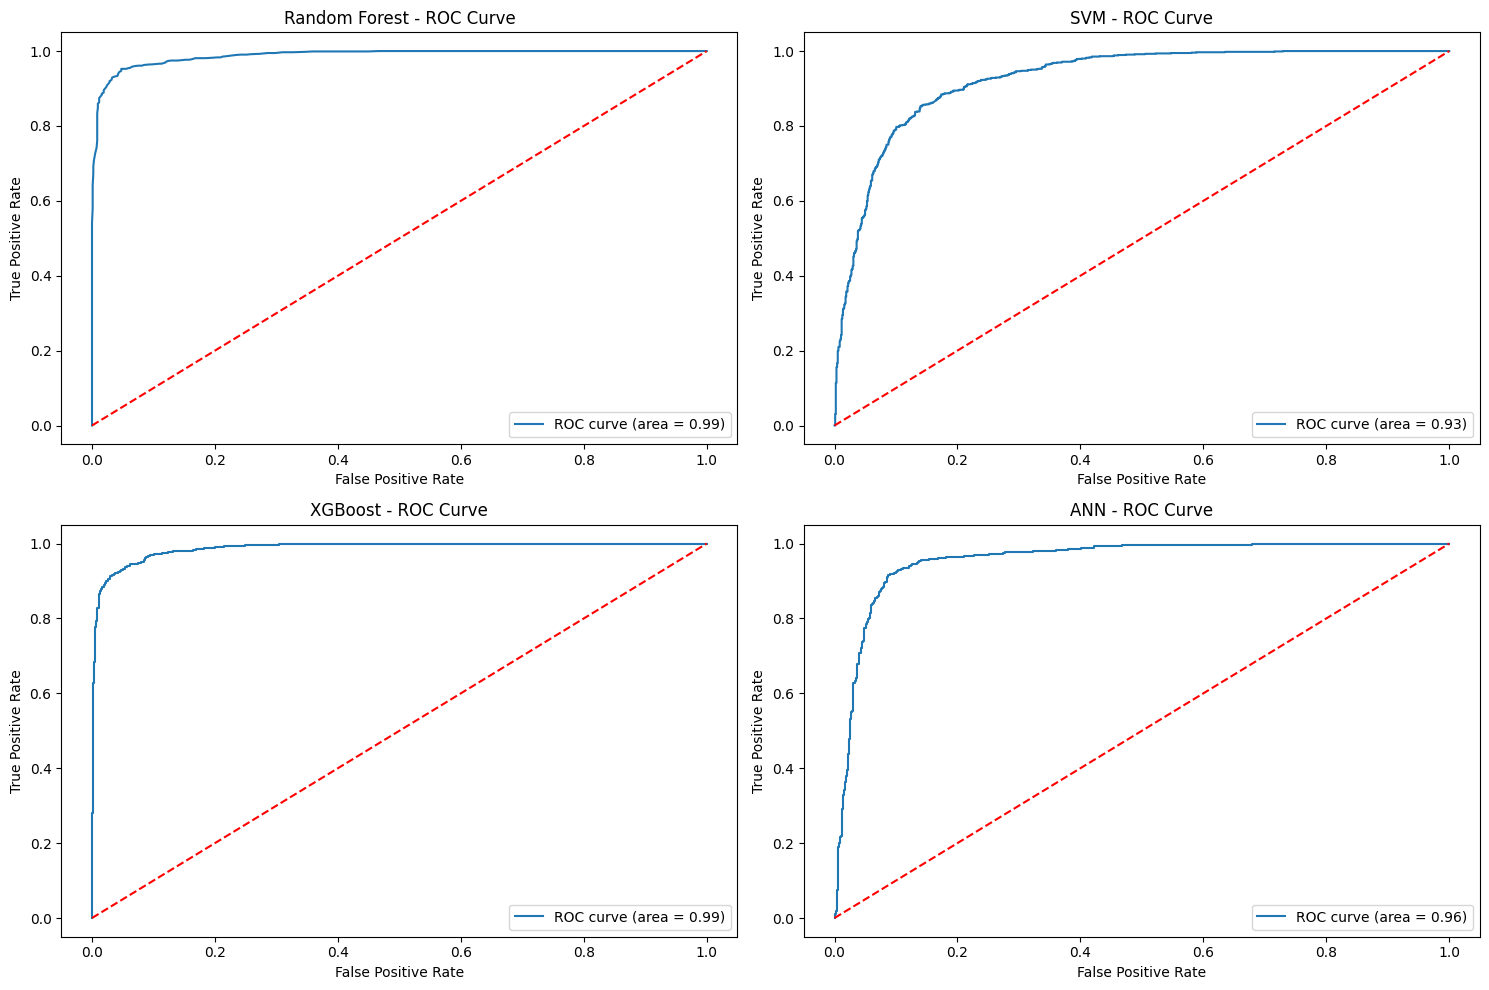

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features for ANN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Initialize and train SVM model
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Initialize and train ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
ann_model.fit(X_train_scaled, y_train)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    report = classification_report(y_test, y_pred, zero_division=1)
    return y_pred, y_pred_proba, accuracy, precision, recall, f1, report

# Evaluate each model
results = {}
models = {'Random Forest': rf_model, 'SVM': svm_model, 'XGBoost': xgb_model, 'ANN': ann_model}

for name, model in models.items():
    if name in ['SVM', 'ANN']:
        y_pred, y_pred_proba, accuracy, precision, recall, f1, report = evaluate_model(model, X_test_scaled, y_test)
    else:
        y_pred, y_pred_proba, accuracy, precision, recall, f1, report = evaluate_model(model, X_test, y_test)

    results[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Report': report
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", metrics['Accuracy'])
    print("Precision:", metrics['Precision'])
    print("Recall:", metrics['Recall'])
    print("F1 Score:", metrics['F1 Score'])
    print("Classification Report:\n", metrics['Report'])

# Plot ROC and Precision-Recall Curves for each model
plt.figure(figsize=(15, 10))
for i, (model_name, metrics) in enumerate(results.items()):
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    roc_auc = roc_auc_score(y_test, metrics['y_pred_proba'])

    plt.subplot(2, 2, i + 1)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()



Ablation Study - Feature Set: ('gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status')
Random Forest - Accuracy: 0.9467, Precision: 0.9398, Recall: 0.9546, F1 Score: 0.9471
SVM - Accuracy: 0.8527, Precision: 0.8302, Recall: 0.8871, F1 Score: 0.8577
XGBoost - Accuracy: 0.9356, Precision: 0.9232, Recall: 0.9504, F1 Score: 0.9366
ANN - Accuracy: 0.9108, Precision: 0.9020, Recall: 0.9219, F1 Score: 0.9118

Ablation Study - Feature Set: ('gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status')
Random Forest - Accuracy: 0.8907, Precision: 0.8784, Recall: 0.9072, F1 Score: 0.8926
SVM - Accuracy: 0.7682, Precision: 0.7579, Recall: 0.7890, F1 Score: 0.7731
XGBoost - Accuracy: 0.8791, Precision: 0.8584, Recall: 0.9082, F1 Score: 0.8826
ANN - Accuracy: 0.8258, Precision: 0.8192, Recall: 0.8365, F1 Score: 0.8278

Ablation Study - Fea

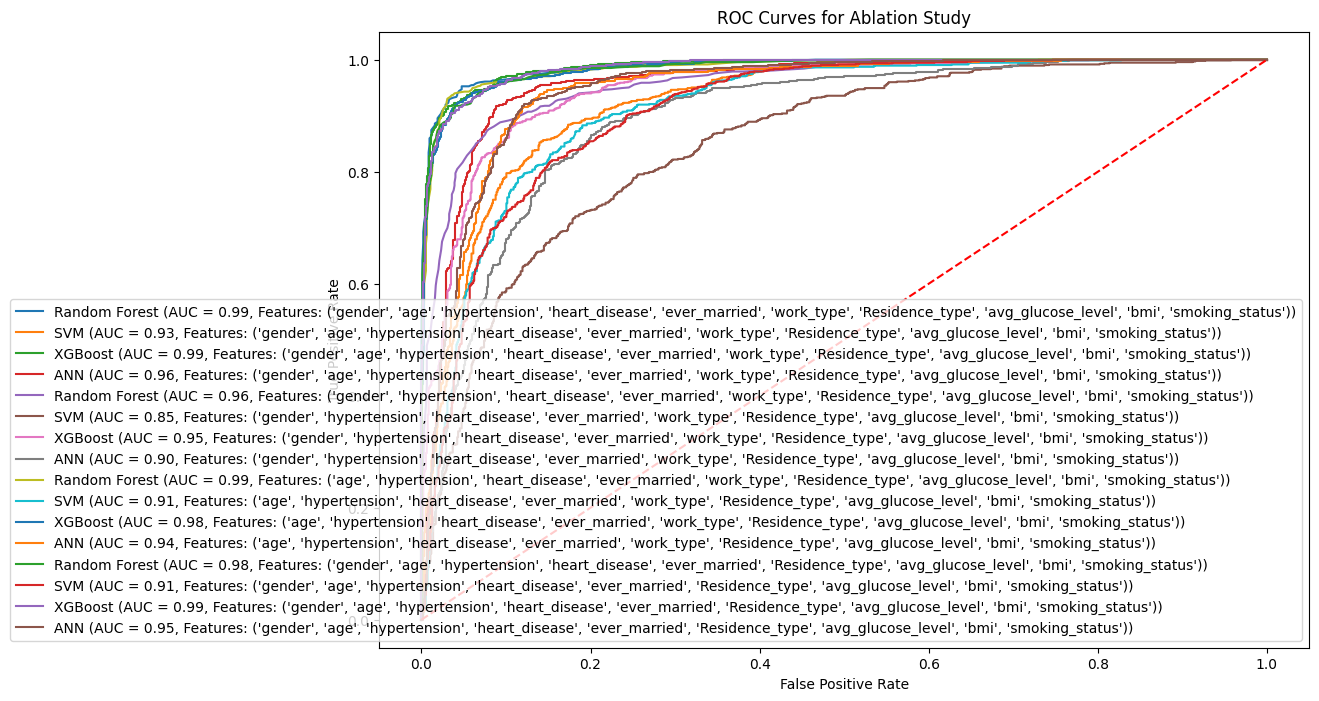

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features for ANN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'ANN': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    return y_pred_proba, accuracy, precision, recall, f1

# Function to perform ablation study
def ablation_study(X, y, feature_sets):
    results = {}
    for feature_set in feature_sets:
        # Split data based on the selected features
        X_subset = X[list(feature_set)]
        X_resampled_subset, y_resampled_subset = smote.fit_resample(X_subset, y)
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_resampled_subset, y_resampled_subset, test_size=0.2, random_state=42)

        # Standardize the features for ANN and SVM
        X_train_scaled_subset = scaler.fit_transform(X_train_subset)
        X_test_scaled_subset = scaler.transform(X_test_subset)

        # Evaluate each model on the selected feature set
        model_results = {}
        for name, model in models.items():
            if name in ['SVM', 'ANN']:
                y_pred_proba, accuracy, precision, recall, f1 = evaluate_model(model.fit(X_train_scaled_subset, y_train_subset), X_test_scaled_subset, y_test_subset)
            else:
                y_pred_proba, accuracy, precision, recall, f1 = evaluate_model(model.fit(X_train_subset, y_train_subset), X_test_subset, y_test_subset)

            model_results[name] = {
                'y_pred_proba': y_pred_proba,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1
            }
        results[tuple(feature_set)] = model_results  # Convert list to tuple for hashability
    return results

# Define feature sets for the ablation study
feature_sets = [
    X.columns.tolist(),  # All features
    X.columns.drop('age').tolist(),  # Exclude 'age'
    X.columns.drop('gender').tolist(),  # Exclude 'gender'
    X.columns.drop('work_type').tolist()  # Exclude 'work_type'
]

# Perform ablation study
ablation_results = ablation_study(X_resampled, y_resampled, feature_sets)

# Print results of the ablation study
for feature_set, model_results in ablation_results.items():
    print(f"\nAblation Study - Feature Set: {feature_set}")
    for model_name, metrics in model_results.items():
        print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")

# Plot ROC Curves for the feature sets
plt.figure(figsize=(12, 8))
for feature_set, model_results in ablation_results.items():
    for model_name, metrics in model_results.items():
        fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
        roc_auc = roc_auc_score(y_test, metrics['y_pred_proba'])
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f}, Features: {feature_set})')

plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curves for Ablation Study')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


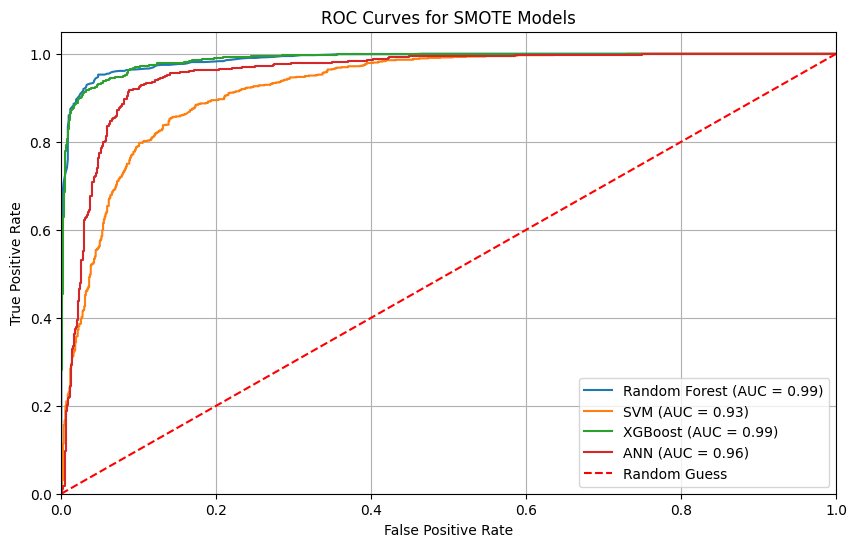

Random Forest - Accuracy: 0.9467, Precision: 0.9398, Recall: 0.9546, F1 Score: 0.9471
SVM - Accuracy: 0.8527, Precision: 0.8302, Recall: 0.8871, F1 Score: 0.8577
XGBoost - Accuracy: 0.9356, Precision: 0.9232, Recall: 0.9504, F1 Score: 0.9366
ANN - Accuracy: 0.9108, Precision: 0.9020, Recall: 0.9219, F1 Score: 0.9118


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features for ANN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'ANN': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    return y_pred_proba, accuracy, precision, recall, f1

# Perform ablation study with only SMOTE applied
results = {}
for name, model in models.items():
    model.fit(X_train_scaled if name in ['SVM', 'ANN'] else X_train, y_train)
    y_pred_proba, accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled if name in ['SVM', 'ANN'] else X_test, y_test)
    results[name] = {
        'y_pred_proba': y_pred_proba,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Plot ROC Curves for the four models
plt.figure(figsize=(10, 6))
for model_name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    roc_auc = roc_auc_score(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curves for SMOTE Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print classification results
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Model Evaluation:
Accuracy: 0.9466737064413939
Precision: 0.9397715472481828
Recall: 0.9546413502109705
F1 Score: 0.9471480900052328
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       946
           1       0.94      0.95      0.95       948

    accuracy                           0.95      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.95      0.95      0.95      1894


SVM Model Evaluation:
Accuracy: 0.8526927138331574
Precision: 0.8302073050345509
Recall: 0.8871308016877637
F1 Score: 0.8577256501784803
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       946
           1       0.83      0.89      0.86       948

    accuracy                           0.85      1894
   macro avg       0.85      0.85      0.85      1894
weighted avg       0.85      0.85      0.85      1894


XGBoost Mod

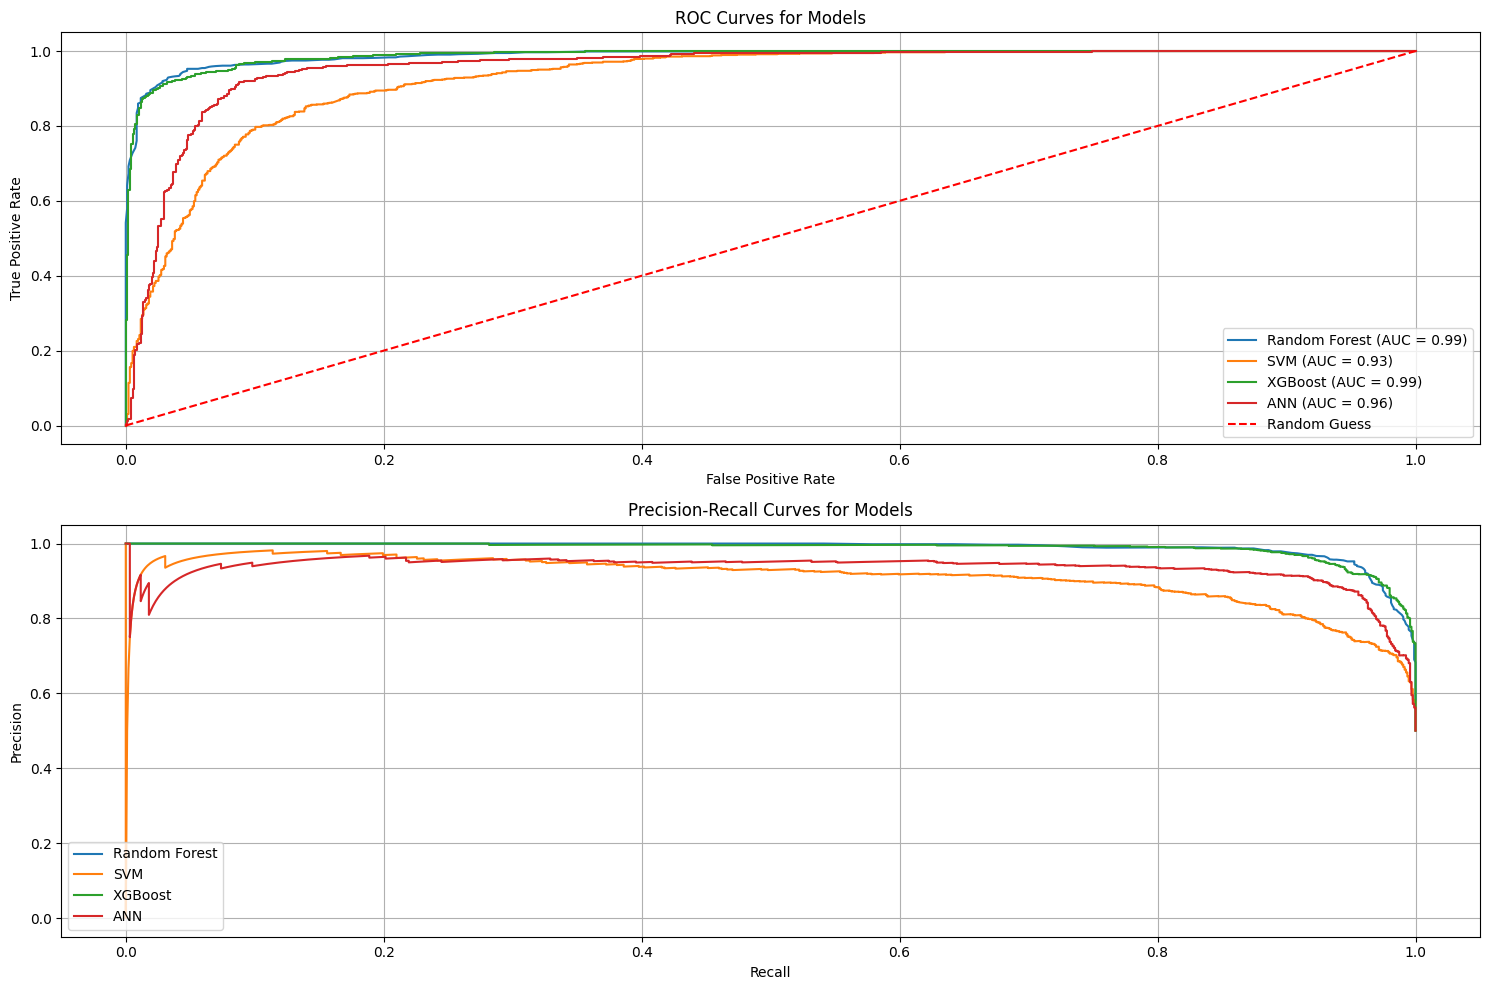

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features for ANN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Initialize and train SVM model
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Initialize and train ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
ann_model.fit(X_train_scaled, y_train)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    report = classification_report(y_test, y_pred, zero_division=1)
    return y_pred, y_pred_proba, accuracy, precision, recall, f1, report

# Evaluate each model
results = {}
models = {'Random Forest': rf_model, 'SVM': svm_model, 'XGBoost': xgb_model, 'ANN': ann_model}

for name, model in models.items():
    if name in ['SVM', 'ANN']:
        y_pred, y_pred_proba, accuracy, precision, recall, f1, report = evaluate_model(model, X_test_scaled, y_test)
    else:
        y_pred, y_pred_proba, accuracy, precision, recall, f1, report = evaluate_model(model, X_test, y_test)

    results[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Report': report
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", metrics['Accuracy'])
    print("Precision:", metrics['Precision'])
    print("Recall:", metrics['Recall'])
    print("F1 Score:", metrics['F1 Score'])
    print("Classification Report:\n", metrics['Report'])

# Plot ROC and Precision-Recall Curves for each model
plt.figure(figsize=(15, 10))

# ROC Curves
plt.subplot(2, 1, 1)  # Create a subplot for ROC Curves
for model_name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    roc_auc = roc_auc_score(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()

# Precision-Recall Curves
plt.subplot(2, 1, 2)  # Create a subplot for Precision-Recall Curves
for model_name, metrics in results.items():
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_pred_proba'])
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curves for Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:35:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


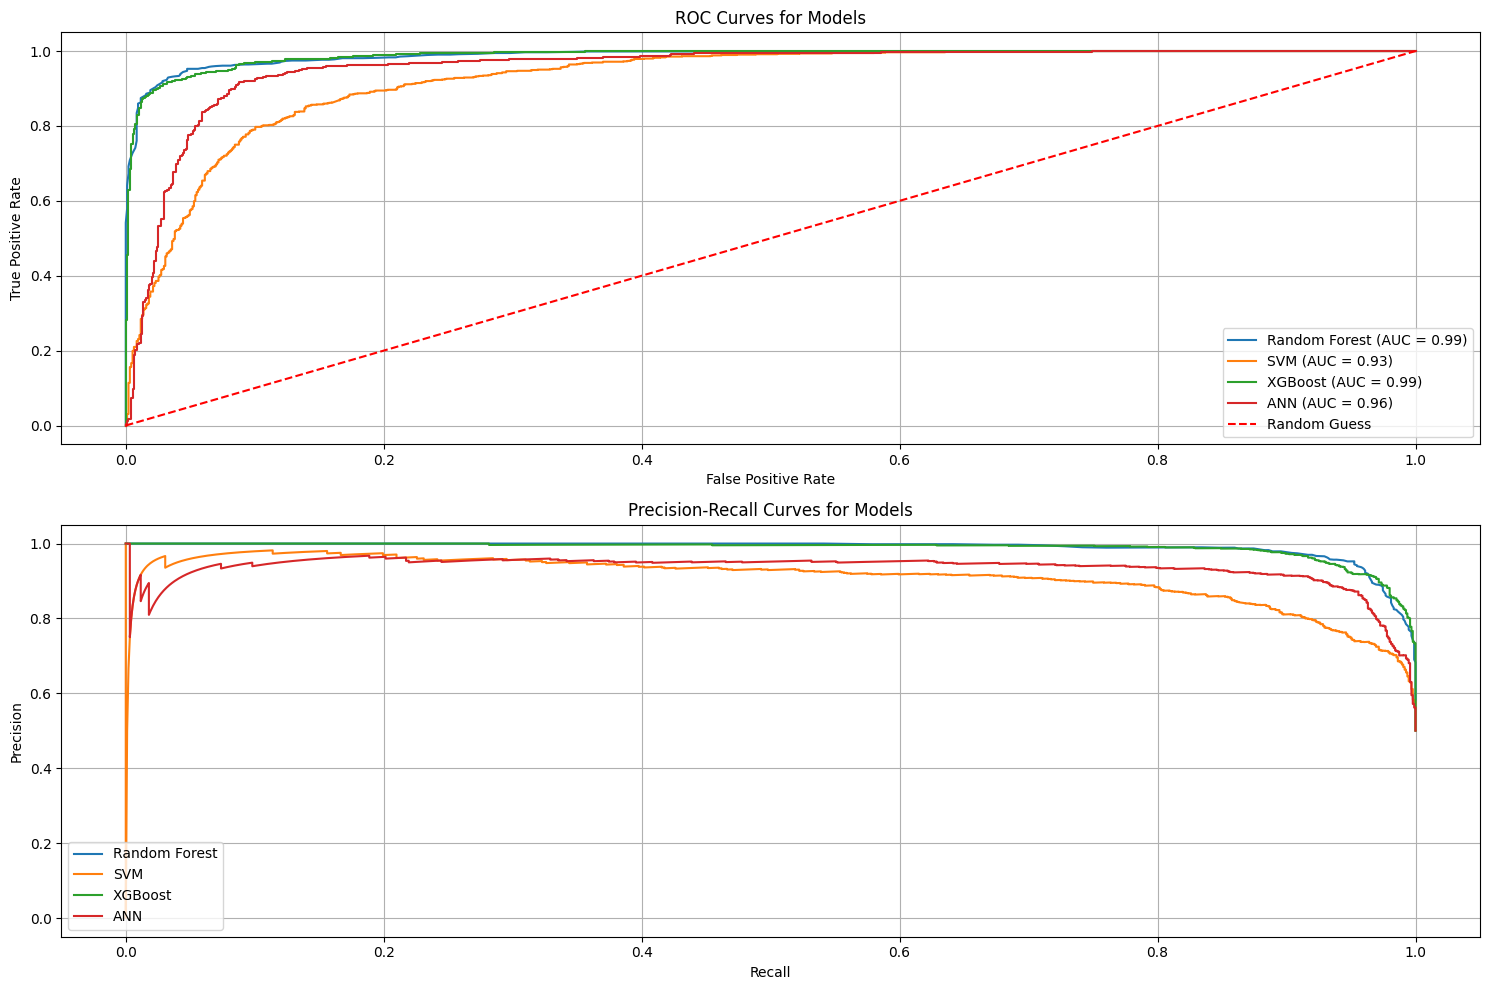

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load and encode dataset
data = pd.read_csv('/content/modified_data_strings_only.csv')

# Encode categorical columns
def encode_string_columns(df, columns):
    encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, encoders

# Specify columns with string values to encode
string_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded, encoding_mapping = encode_string_columns(data, string_columns)

# Define features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features for ANN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
ann_model.fit(X_train_scaled, y_train)

# Create a dictionary to map model names to model objects
models = {
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'ANN': ann_model
}

# Function to evaluate models
def evaluate_model(model, X_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    return y_pred_proba

# Plot ROC and Precision-Recall Curves for each model
plt.figure(figsize=(15, 10))

# ROC Curves
plt.subplot(2, 1, 1)  # Create a subplot for ROC Curves
for model_name, model in models.items():
    # Use the correct X_test depending on the model
    if model_name in ['SVM', 'ANN']:
        y_pred_proba = evaluate_model(model, X_test_scaled)
    else:
        y_pred_proba = evaluate_model(model, X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()

# Precision-Recall Curves
plt.subplot(2, 1, 2)  # Create a subplot for Precision-Recall Curves
for model_name, model in models.items():
    # Use the correct X_test depending on the model
    if model_name in ['SVM', 'ANN']:
        y_pred_proba = evaluate_model(model, X_test_scaled)
    else:
        y_pred_proba = evaluate_model(model, X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curves for Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()

plt.tight_layout()
plt.show()
